<a href="https://colab.research.google.com/github/21PA1A6109/Deep-Learning/blob/main/DL_EXPT_1_PERCEPTRON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math


In [ ]:
np.random.seed(42)

In [ ]:
#Step Function Definition:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

In [ ]:
#Prediction Function:
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [ ]:
#Perceptron Step Function:
def perceptronStep(X, y, W, b, learn_rate = 0.01):

    for i in range(len(X)):
        yhat = prediction(X[i], W, b)
        if y[i]-yhat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-yhat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

In [ ]:
#Training Perceptron Algorithm:
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    boundary_lines = []
    for i in range(num_epochs):
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


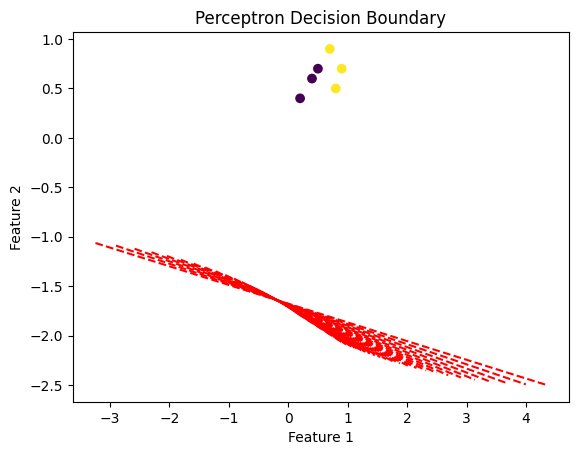

In [ ]:
import matplotlib.pyplot as plt


X = np.array([[0.2, 0.4], [0.4, 0.6], [0.5, 0.7], [0.7, 0.9], [0.8, 0.5], [0.9, 0.7]])
y = np.array([0, 0, 0, 1, 1, 1])


boundary_lines = trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25)


plt.scatter(X[:,0], X[:,1], c=y)


for line in boundary_lines:
    slope, intercept = line
    x_vals = np.array(plt.xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, 'r--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')
plt.show()
